### Features of rule dim weights
Previously looked at decoding accuracy differences in feature decoding when feature matches rule dimension vs not
Here, will look at weights, with new unit structures

### main issue: 
Different decoders have different sessions that satisify conditions, are trained on different neurons


In [51]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils

import os
import pandas as pd
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"

# output dir that was specified in the decode_features_with_pseudo.py
OUTPUT_DIR = "/data/patrick_scratch/pseudo"

SESSIONS_PATH = "/data/patrick_scratch/multi_sess/valid_sessions_enough_rules_2.pickle"

feature_dim = "Pattern"

### Plot decoder accuracies

Text(0, 0.5, 'Decoder Accuracy')

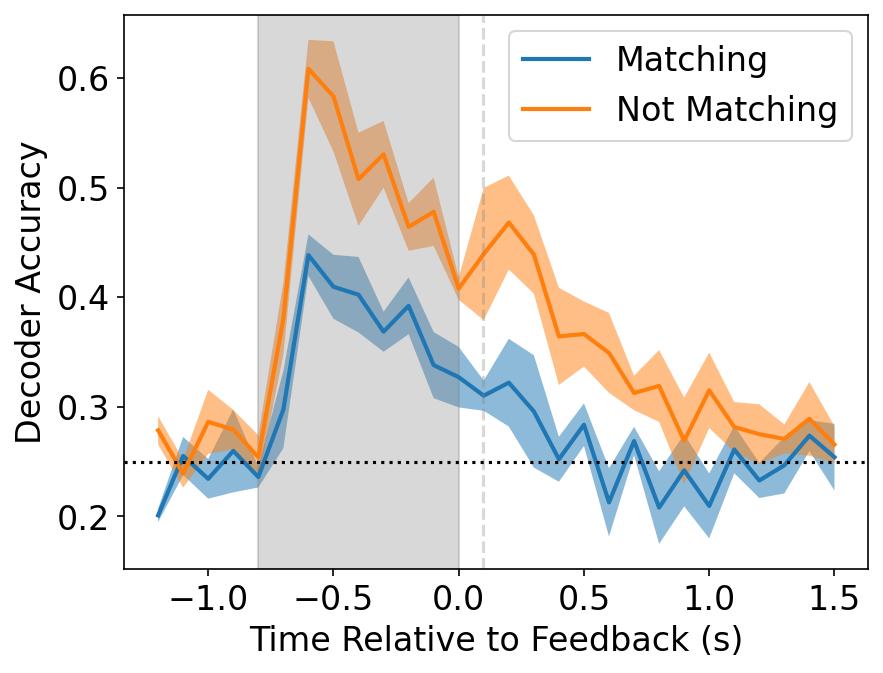

In [53]:
matching = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_cors_match_rule_dim_test_accs_2.npy"))
not_matching = np.load(os.path.join(OUTPUT_DIR, f"{feature_dim}_cors_not_match_rule_dim_test_accs_2.npy"))
matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(dpi=150)
# plots the mean and standard deviation of decoding accuracy across splits, by time. 
visualization_utils.visualize_accuracy_across_time_bins(
    matching,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Matching",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    not_matching,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Not Matching",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### Plot glass brain

In [54]:
valid_sess = pd.read_pickle(SESSIONS_PATH)
valid_sess = valid_sess[valid_sess[feature_dim]]
positions = spike_utils.get_unit_positions(valid_sess)

In [55]:
len(valid_sess)

9

In [56]:
fig = visualization_utils.generate_glass_brain(positions, "manual_structure", None)
# directly write this figure as a html file. 
# ran into performance issues displaying the glass brain within the notebook
fig.write_html(f"/data/patrick_scratch/pseudo/figs/rule_dim_{feature_dim}_units_glass_brain_estimated_manual_struc_2.html")

### Plot weights

In [57]:
def plot_weights(models, positions, ax):
    num_units = len(positions.PseudoUnitID.unique())
    weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_units, 4)
    sums = np.sum(weights, axis=0)
    normalized = weights / sums

    visualization_utils.visualize_weights(positions, normalized, "manual_structure", ax=ax)

[ 96.5  99.5 133.5 178.5 191.5 205.5 231.5 235.5]
10
[ 96.5  99.5 133.5 178.5 191.5 205.5 231.5 235.5]
10
[ 96.5  99.5 133.5 178.5 191.5 205.5 231.5 235.5]
10


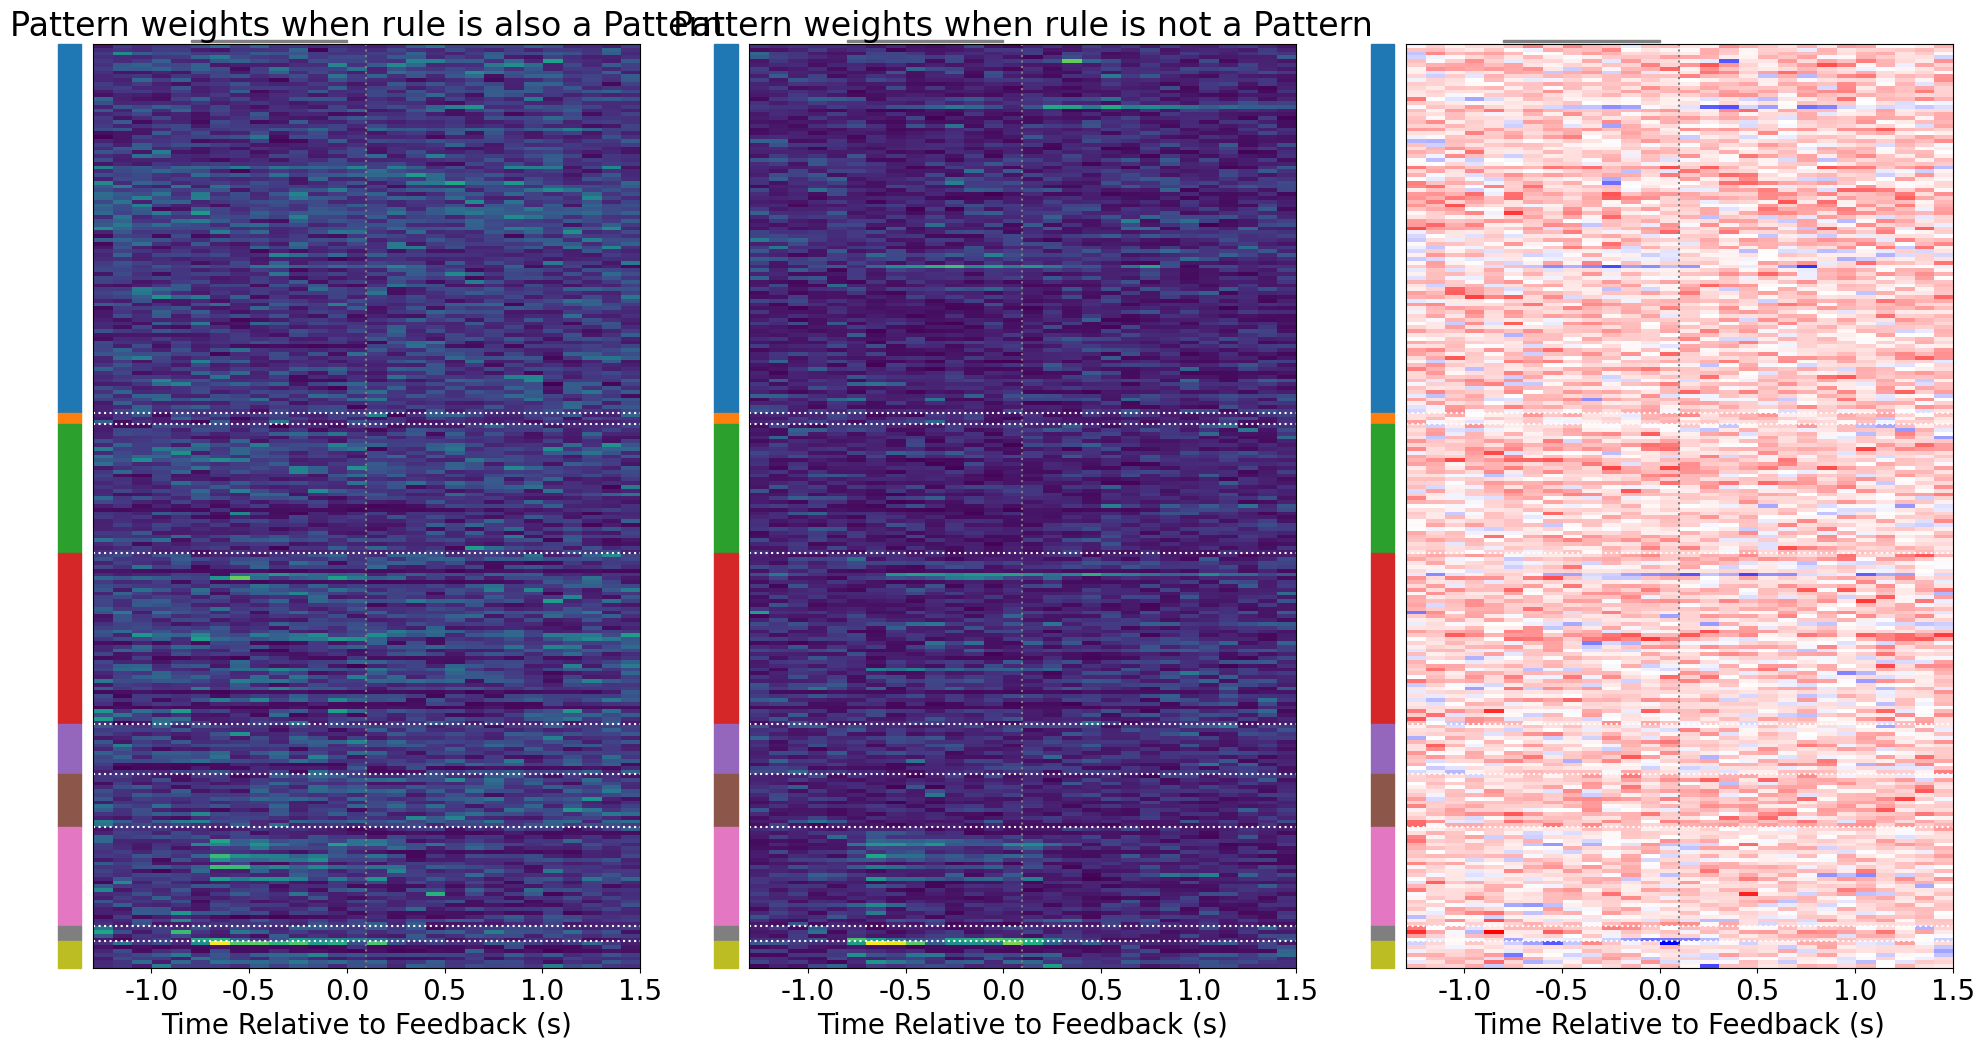

In [58]:
matplotlib.rcParams.update({'font.size': 20})
fix, axs = plt.subplots(1, 3, figsize=(24, 12))
model_matching = np.load(f"/data/patrick_scratch/pseudo/{feature_dim}_cors_match_rule_dim_models_2.npy", allow_pickle=True)
model_not_matching = np.load(f"/data/patrick_scratch/pseudo/{feature_dim}_cors_not_match_rule_dim_models_2.npy", allow_pickle=True)

plot_weights(model_matching, positions, axs[0])
axs[0].set_title(f"{feature_dim} weights when rule is also a {feature_dim}")

plot_weights(model_not_matching, positions, axs[1])
axs[1].set_title(f"{feature_dim} weights when rule is not a {feature_dim}")

num_units = len(positions.PseudoUnitID.unique())
matching_weights = classifier_utils.evaluate_model_weights_by_time_bins(model_matching, num_units, 4)
normalized_matching = matching_weights / np.sum(matching_weights, axis=0)

not_matching_weights = classifier_utils.evaluate_model_weights_by_time_bins(model_not_matching, num_units, 4)
normalized_not_matching = not_matching_weights / np.sum(not_matching_weights, axis=0)
abs_diff = normalized_matching - normalized_not_matching
cmap = plt.get_cmap("bwr")
visualization_utils.visualize_weights(positions, abs_diff, "manual_structure", ax=axs[2], cmap=cmap)
